# Map Playground

This notebook is set up to demonstrate some of the cool things `pandas` and `numpy` can do.
Additionally, the notebook can render `HTML`, so if you want to get _extra_ fancy with the presentation, keep that in mind.

To run a cell, first double click it, so that the bar on the left turns green. Then, press `Shift` & `Enter` and the cell will run. Keep in mind that variable used in the cells are considered global, so if you have _x_ in one cell, and declare _x_ again in another further down, you'll overwrite the original.

If you want more details, please see the pdfs I uploaded, or for graphing, visit these links:
 - https://pandas.pydata.org/pandas-docs/stable/visualization.html
 - http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
 - https://matplotlib.org/users/pyplot_tutorial.html

Finally, I've added cells at the bottom that will generate the TSP dataframes, so we can try playing with them a little bit, without worrying too much about keeping code clean or breaking anything important. These notebooks are great for testing and visualising what's going on.

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Circle

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
sns.set_context("paper")

## Points in Circles

Write a function called `pts_in_circle( pts, center, radius)` that accepts:

`pts`:    a 2D floating point array with shape (N,2) representing N points

`center`: a tuple containing (x,y) coordinates, which are the center of the circle, and

`radius`: the radius of the circle. 

Some commands are:

`(pts[0,0], pts[0,1])`: the first point

`(pts[9,0], pts[9,1])`: the ninth point

`pts[:,0]`: all the x-coordinates

`pts[:,1]`: all the y-coordinaes.

This function returns a 2D array of all the points inside a *circle* given by `center` and `radius`, using only `numpy` operations and no loops.

In [21]:
def pts_in_circle( pts, center, radius):
    x,y = pts[:, 0], pts[:, 1]
    b = (((x-center[0])**2 + (y-center[1])**2)**0.5) <= radius
    pts = pts[b]
    return pts

`pts_in_circle` in action:

In [22]:
np.random.seed( 47 ) # ensures the same random sequence is created
pts = np.random.uniform(0.0, 1.0,(500,2)) # (x,y) = (pts[0,0], pts[0,1])
cir1 = (0.5,0.5);     cir1_r = 0.09
cir2 = (0.25, 0.75);  cir2_r = 0.05
cir3 = (0.2,0.1);     cir3_r = 0.07

print('Circle 1', end=' ')
cir1_pts = pts_in_circle( pts, cir1, cir1_r)
for x,y in cir1_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

print('\nCircle 2', end=' '); 
cir2_pts = pts_in_circle( pts, cir2, cir2_r)
for x,y in cir2_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

print('\nCircle 3', end=' ')
cir3_pts = pts_in_circle( pts, cir3, cir3_r)
for x,y in cir3_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

Circle 1 (0.44,0.53) (0.55,0.49) (0.57,0.49) (0.46,0.48) (0.53,0.47) (0.55,0.52) (0.57,0.47) (0.57,0.55) 
Circle 2 (0.25,0.75) (0.25,0.72) (0.23,0.75) (0.24,0.77) (0.28,0.77) 
Circle 3 (0.17,0.04) (0.19,0.09) (0.23,0.16) (0.23,0.11) 

And now graphed:

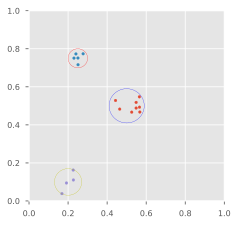

In [23]:
from matplotlib.patches import Circle
c1_ptch = Circle( cir1, cir1_r, fill=False, ec='b')
c2_ptch = Circle( cir2, cir2_r, fill=False, ec='r')
c3_ptch = Circle( cir3, cir3_r, fill=False, ec='y')

fig = plt.figure(1, figsize=(3.5,3.5) ); ax = plt.subplot() # make the plot square
ax.add_patch(c1_ptch); ax.add_patch(c2_ptch); ax.add_patch(c3_ptch);

ax.scatter( cir1_pts[:,0], cir1_pts[:,1], marker='.' )
ax.scatter( cir2_pts[:,0], cir2_pts[:,1], marker='.' )
ax.scatter( cir3_pts[:,0], cir3_pts[:,1], marker='.' )
plt.xlim(0.0,1.0); plt.ylim(0.0,1.0)  # ensures the plot is square
None

A function called `count_pts_in_circle`, that returns a count of points in the circles as an integer.
`pts_in_circle` princples are heavily re-used here.

In [24]:
def count_pts_in_circle(pts, center, radius ):  # slightly smaller
    x,y = pts[:, 0], pts[:, 1]
    b = (((x-center[0])**2 + (y-center[1])**2)**0.5) <= radius
    return np.sum(b)

Testing`count_pts_in_circle` with:

In [25]:
print('cir1 = %d' % count_pts_in_circle( pts, cir1, .10) )
print('cir2 = %d' % count_pts_in_circle( pts, cir2, .05) )
print('cir3 = %d' % count_pts_in_circle( pts, cir3, .07) )

cir1 = 9
cir2 = 5
cir3 = 4


## Circles in Circles

A function called `circles_inside_circle( pts, circle)` that accepts:

`pts`:    a 2D floating point array with shape (N,3) representing N circles in the form `(x,y,r)`, where `(x,y)` is the center of a circle with radius `r`

`circle`: A 3-tuple `(x,y,r)`, containing the (x,y) coordinates of the center of the
circle, and radius `r`. This circle is the one that contains the others.

In [26]:
def circles_inside_circle( pts, circle):
    x, y, r = pts[:, 0], pts[:, 1], pts[:, 2]
    b = (((x-circle[0])**2 + (y-circle[1])**2)**0.5) <= circle[2]-r
    pts = pts[b]
    return pts

Testing with:

In [27]:
np.random.seed( 47 ) # ensures the same random sequence is created
pts = np.random.uniform(0.0, 10.0,(500,3)) # (x,y,r) = (pts[0,0], pts[0,1], pts[0,2])
# scale the radius
pts[:,2] /= 6.0

def display(msg, circles ):
    print(msg, 'contains ', end='')
    for x,y,r in circles:
        print('({:.1f},{:.1f},{:.2f})'.format(x,y,r), end=' ' )
    print()
    
tests = [ (5.0,5.0, 1.0), (1.0,2.0, 1.0), (7.5, 9.0, 1.0),  ]
for cir in tests:
    c = circles_inside_circle(pts,cir)
    display( str(cir), c)

(5.0, 5.0, 1.0) contains (5.3,5.5,0.43) (5.7,4.7,0.10) (4.7,5.7,0.20) 
(1.0, 2.0, 1.0) contains (0.2,1.7,0.06) (0.4,1.8,0.39) (0.7,2.5,0.42) (1.2,2.7,0.05) (1.3,1.7,0.36) 
(7.5, 9.0, 1.0) contains (7.1,8.8,0.32) (7.5,9.0,0.32) 


Plot all the circles contained in `(3.5, 4.5, 1.75)` in a similar way like above. `scatter` plots the circle 
centers, and `Circle` plots the outlines. 

The containing circle is plotted in a differenct colour, using the keyword argment `ec`.

In [28]:
cc = (3.5, 4.5, 1.75)
cirs = circles_inside_circle(pts, cc )

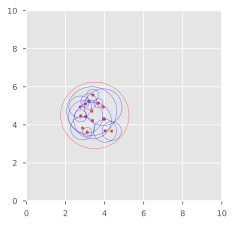

In [29]:
main = Circle( (cc[0], cc[1]), cc[2], fill=False, ec='r')
ig = plt.figure(1, figsize=(3.5,3.5) ); ax = plt.subplot() # make the plot square
ax.add_patch(main);

ax.scatter( cirs[:,0], cirs[:,1], marker='.' )
for i in cirs:
    circ = Circle( (i[0], i[1]), i[2], fill=False, ec='b')
    ax.add_patch(circ);

plt.xlim(0.0,10.0); plt.ylim(0.0,10.0)  # ensures the plot is square
pass

## TSP Set-up

In [30]:
cols = ['Latitude (Range shifted)', 'Longitude (Range shifted)']
def read_file( fnum ):
    if fnum == 1:
        fname = "TSP_WesternSahara_29.txt"
    elif fnum == 2:
        fname = "TSP_Uruguay_734.txt"
    elif fnum == 3:
        fname = "TSP_Canada_4663.txt"
    else:
        print('Warning! Invalid seletion. Defaulting to 1')
        fname = "TSP_WesternSahara_29.txt"
    
    df = pd.read_csv('Setups/TSP/TSP_Inputs/' + fname, index_col=0, header=None, delimiter=' ')
    df.columns = ['Lat', 'Lon']
    df.index.names = ['City']
    
    df['Lat'] = df['Lat'] - (df['Lat'].min() + (df['Lat'].max() - df['Lat'].min())/2) # Translate the y values
    df['Lon'] = (df['Lon'].min() + (df['Lon'].max() - df['Lon'].min())/2) - df['Lon'] # Translate and invert the x values
    
    df.columns = cols # Rename the columns
    return df

SAHARA = read_file(1)
URUGUAY = read_file(2)
CANADA = read_file(3)

In [31]:
def cities_in_radius(dataframe, city, radius):
    x, y = dataframe[cols[1]], dataframe[cols[0]]
    bool_frame = (((x-dataframe.loc[city][1])**2 + (y-dataframe.loc[city][0])**2)**0.5) <= radius
    image = dataframe[bool_frame]
    image.index.names = ['City - {}'.format(city)]
    return image

In [32]:
def scatter_heatmap(dataframe, target_cities=None, target_range=None):
    import warnings; warnings.filterwarnings("ignore")
    
    dataframe.plot.scatter(x=cols[1], y=cols[0], c=dataframe.index.get_values(), colormap='winter')

    if target_cities and target_range:
        if type(target_cities) == int: target_cities = [target_cities]
        fig = plt.figure(1, figsize=(12,12))
        ax = plt.subplot()
        for city in target_cities:
            circle_center = (dataframe.loc[city][1], dataframe.loc[city][0])
            patch = Circle(circle_center, target_range, fill=False, ec='r', linewidth=1.5)
            ax.add_patch(patch)
            print(cities_in_radius(dataframe, city, target_range))

In [33]:
print(SAHARA[cols[0]].max())
print(SAHARA[cols[1]].max())
print(SAHARA[cols[0]].min())
print(SAHARA[cols[1]].min())
SAHARA.head()

3314.583350000001
3633.333349999999
-3314.583350000001
-3633.333350000001


,Latitude (Range shifted),Longitude (Range shifted)
City,,
1,-3314.58335,-3633.33335
2,-3247.91665,-3600.00005
3,-2847.91665,449.99995
4,-2547.91665,-683.33335
5,-2547.91665,-1500.00005


           Latitude (Range shifted)  Longitude (Range shifted)
City - 23                                                     
21                       2878.19445                  414.72225
22                       2948.19445                   50.83335
23                       3005.69445                  263.33335
29                       3314.58335                  474.44445
          Latitude (Range shifted)  Longitude (Range shifted)
City - 1                                                     
1                      -3314.58335                -3633.33335
2                      -3247.91665                -3600.00005
           Latitude (Range shifted)  Longitude (Range shifted)
City - 25                                                     
25                       3085.41665                 3016.66665
27                       3118.75005                 3083.33335
           Latitude (Range shifted)  Longitude (Range shifted)
City - 11                                                  

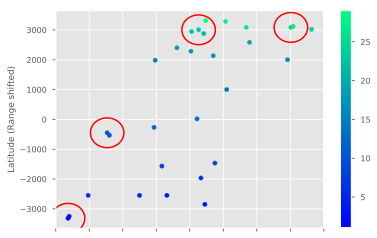

In [34]:
scatter_heatmap(SAHARA, [23, 1, 25, 11], 500)
print(cities_in_radius(SAHARA, 23, 500))

In [35]:
print(URUGUAY[cols[0]].max())
print(URUGUAY[cols[1]].max())
print(URUGUAY[cols[0]].min())
print(URUGUAY[cols[1]].min())
URUGUAY.head()

2416.6667000000016
2558.333350000001
-2416.6667000000016
-2558.333350000001


,Latitude (Range shifted),Longitude (Range shifted)
City,,
1,-2416.6667,-1774.99995
2,-2383.3333,-1241.66665
3,-2316.6667,-1724.99995
4,-2300.0000,-991.66665
5,-2300.0000,-1091.66665


           Latitude (Range shifted)  Longitude (Range shifted)
City - 25                                                     
11                       -2116.6667                -1574.99995
17                       -1983.3333                -1024.99995
18                       -1950.0000                -1824.99995
19                       -1933.3333                -1041.66665
21                       -1866.6667                -1174.99995
22                       -1866.6667                -1658.33335
25                       -1816.6667                -1458.33335
27                       -1766.6667                -1924.99995
36                       -1583.3333                -1674.99995
44                       -1466.6667                -1158.33335
45                       -1466.6667                -1658.33335
46                       -1466.6667                -1741.66665
50                       -1450.0000                -1158.33335
54                       -1383.3333                -122

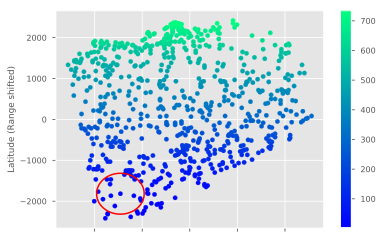

In [36]:
scatter_heatmap(URUGUAY, 25, 500)

In [37]:
CANADA.head()

,Latitude (Range shifted),Longitude (Range shifted)
City,,
1,-20341.66665,14175.0000
2,-20174.99995,14291.6667
3,-20158.33335,13891.6667
4,-20108.33335,14075.0000
5,-20108.33335,13908.3333


            Latitude (Range shifted)  Longitude (Range shifted)
City - 125                                                     
1                       -20341.66665                 14175.0000
2                       -20174.99995                 14291.6667
3                       -20158.33335                 13891.6667
4                       -20108.33335                 14075.0000
5                       -20108.33335                 13908.3333
6                       -20091.66665                 14241.6667
7                       -20041.66665                 14375.0000
8                       -20041.66665                 13725.0000
9                       -20008.33335                 14075.0000
10                      -19991.66665                 13858.3333
11                      -19974.99995                 14008.3333
12                      -19908.33335                 14275.0000
13                      -19891.66665                 14908.3333
14                      -19891.66665    

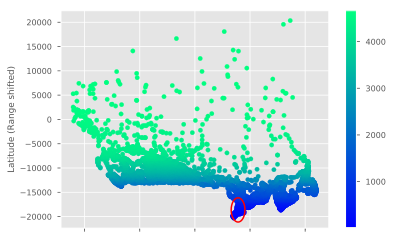

In [38]:
scatter_heatmap(CANADA, 125, 2500)